In [1]:
import pandas as pd
import numpy as np


# Data and Preprocessing

The provided dataset is a set of financial transactions made in the span of two days, in which we have ~248k transactions of the negative class and 492 of the positive class.

It contains 30 features which are only numerical values as they appear to have been transformed and be scaled properly, with the exception of the 'Time' and 'Amount' features.

In [2]:
df = pd.read_csv('data/creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Here we have the columns of the dataset, which we have 31 of.

In [3]:
df.columns


Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

As we can see the data is heavily skewed so most models would just assume that the positive classification can never occur with the exception of few models like a decision tree classifier which is a non parametric model.

Of course there are ways to train the model in a way that the skewness doesn't cause the model to make such false assumptions, for example oversampling and subsampling.\
We'll use subsampling technique to train our SVC model later on.

In [4]:
print(round(df['Class'].value_counts()[0]/len(df)
      * 100, 2), '% of the dataset is of class 0')
print(round(df['Class'].value_counts()[1]/len(df)
      * 100, 2), '% of the dataset is of class 1')


99.83 % of the dataset is of class 0
0.17 % of the dataset is of class 1


Upon using info function on our dataframe we can see that there is no null values in our dataset.

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

Since, the dataset contains no null or missing values and all the features seem to be scaled properly, there seems to be no need of any preprocessing. Only the features Time & Amount are required to be scaled since most models use some sort of distance function between data points for their modeling.

In [6]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# std_scaler = StandardScaler()
# data['scaled_amount'] = std_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
# data['scaled_time'] = std_scaler.fit_transform(df['time'].values.reshape(-1, 1))

rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(
    df['Amount'].values.reshape(-1, 1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))

df = df.drop(['Time', 'Amount'], axis=1)
df.head()


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


From the 30 features we draw a heatmap from the correlation matrix which can indicate positive or negative correlation between the features and most importantly the classes which will be later used to choose the features with high correlation with the classes and remove the rows in which there are outliers.

We could also remove the features that have almost no correlation with our classes to check wether we will get better results.

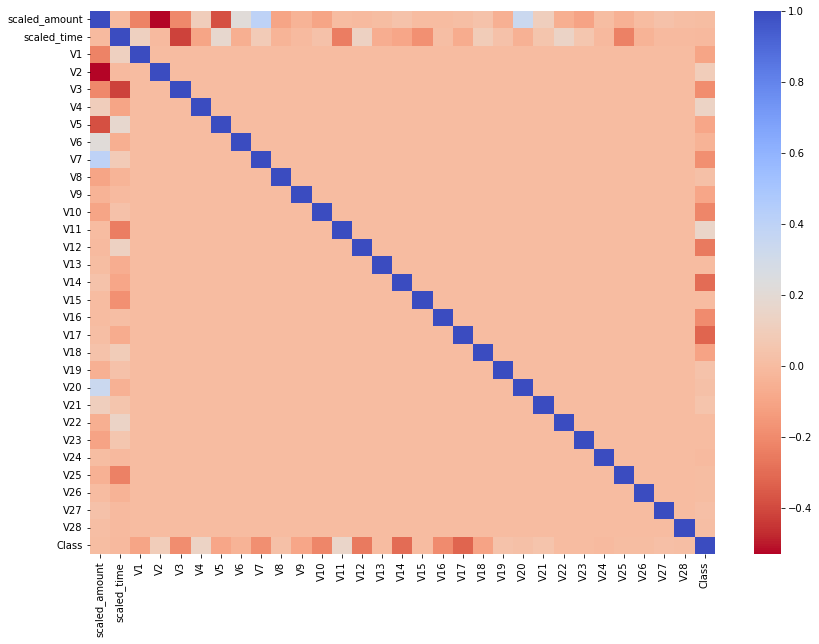

In [8]:
from matplotlib import pyplot as plt
import seaborn

scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']

df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

corr = df.corr()

plt.figure(figsize=(14, 10))
seaborn.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()


Since our data is so skewed most of our models would require some sort of sampling to have an equally distributed dataset that can be used to better predict the classes, here we use undersampling so our model does not assume that our positive class simply never happens.

Of course by doing so we end up not using most of our negative class data and we risk ending up with an inaccurate model.

In [9]:
from imblearn.under_sampling import RandomUnderSampler

X = df.drop('Class', axis=1)
y = df['Class']

rus = RandomUnderSampler(random_state=7)
X_rs, y_rs = rus.fit_resample(X, y)


In [10]:
df_under_samp = pd.DataFrame(
    np.hstack((X_rs, np.array(y_rs)[:, None])), columns=df.columns)
df_under_samp.Class = df_under_samp.Class.astype(int)
df_under_samp.head()


,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.936212,-0.305419,1.136969,0.080784,-0.391915,0.799186,0.602641,0.357558,0.289677,-0.082809,...,0.104915,0.025653,0.019062,-0.328878,-1.284641,0.803771,-0.224211,0.018817,0.019602,0
1,-0.231538,-0.355549,-2.944684,3.031203,-1.699836,-0.213331,-0.341285,-0.083460,-0.860250,1.783055,...,-0.232672,0.205900,0.060669,-0.125559,-1.406570,0.120107,0.398238,-1.155401,-0.273652,0
2,-0.196325,-0.600947,-0.155838,-0.076583,1.663835,-1.419471,-0.076060,-0.257403,0.066496,-0.067499,...,0.214428,0.067197,0.172636,-0.028825,0.008250,-0.260743,-0.479037,-0.125980,-0.209728,0
3,2.668204,0.427766,-0.448963,-1.075179,1.753262,-1.216714,-1.185089,0.596529,-0.013088,0.069194,...,0.736810,0.452843,1.035496,0.325398,-0.417925,-0.593963,-0.102722,-0.038740,-0.048005,0
4,-0.108014,-0.894031,1.121755,0.148297,1.160443,1.494629,-0.461406,0.237934,-0.486397,0.007844,...,-0.125016,-0.015770,0.525970,-0.117747,0.090130,0.595801,-0.229541,0.056954,0.023828,0


In [11]:
print(round(df_under_samp['Class'].value_counts()[
      0]/len(df_under_samp) * 100, 2), '% of the dataset is of class 0')
print(round(df_under_samp['Class'].value_counts()[
      1]/len(df_under_samp) * 100, 2), '% of the dataset is of class 1')


50.0 % of the dataset is of class 0
50.0 % of the dataset is of class 1


Here we make another correlation matrix used to find out which features are highly correlated with our positive class.\
Which is what will be used for choosing which features to remove outliers from and which features to remove when training our model which might or might not have an impact on our model requiring some testing to find out.

Considering features that are highly correlated with the class and highly correlated with each other can be considered the same feature we can use V16, V14, V12 and V10 as our negative correlation features and V2, V4, V11, and V19 as our positive correlation features.

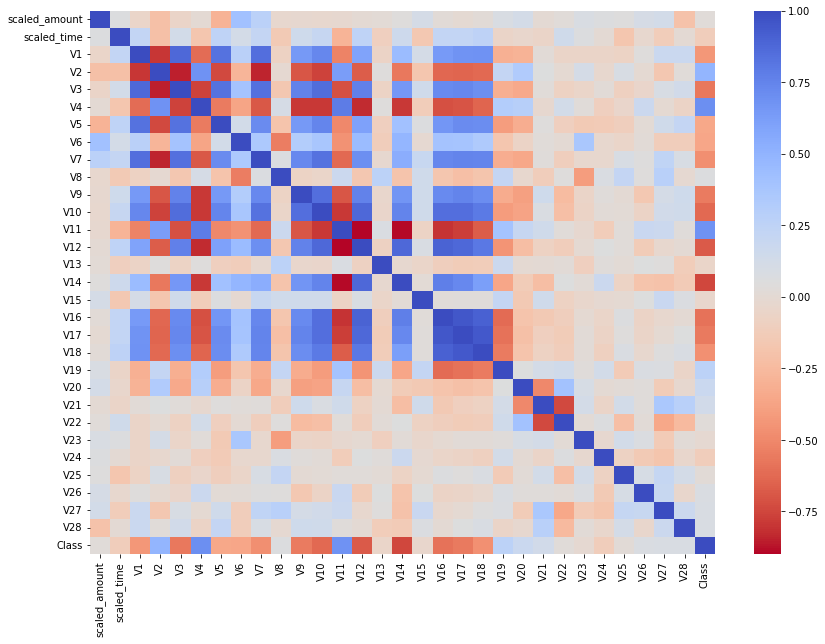

In [12]:
subsample_corr = df_under_samp.corr()

corr = df.corr()

plt.figure(figsize=(14, 10))
seaborn.heatmap(subsample_corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()


Now we draw distribution(density) and box plots for our highly correlated features and remove outliers from those that have extreme outliers using the iqr*1.5 formula.

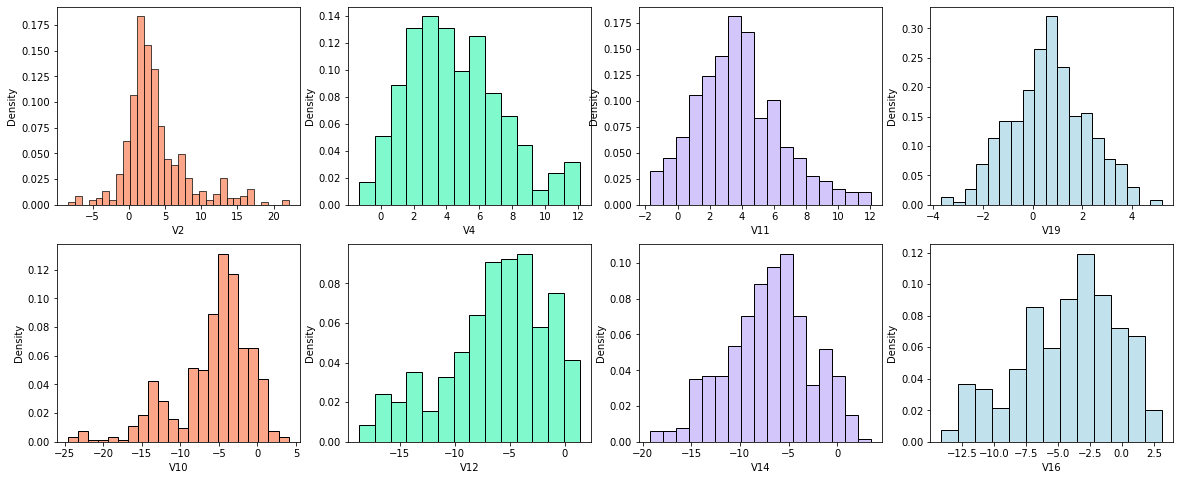

In [13]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 8))

seaborn.histplot(
    x='V2', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][0], stat='density', color='#FB8861')
seaborn.histplot(
    x='V4', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][1], stat='density', color='#56F9BB')
seaborn.histplot(
    x='V11', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][2], stat='density', color='#C5B3F9')
seaborn.histplot(
    x='V19', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[0][3], stat='density', color='#ADD8E6')

seaborn.histplot(
    x='V10', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][0], stat='density', color='#FB8861')
seaborn.histplot(
    x='V12', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][1], stat='density', color='#56F9BB')
seaborn.histplot(
    x='V14', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][2], stat='density', color='#C5B3F9')
seaborn.histplot(
    x='V16', data=df_under_samp.loc[df_under_samp.Class == 1], ax=axes[1][3], stat='density', color='#ADD8E6')

plt.show()


As we can see it appears that V2 and V10 are features with extreme outliers.

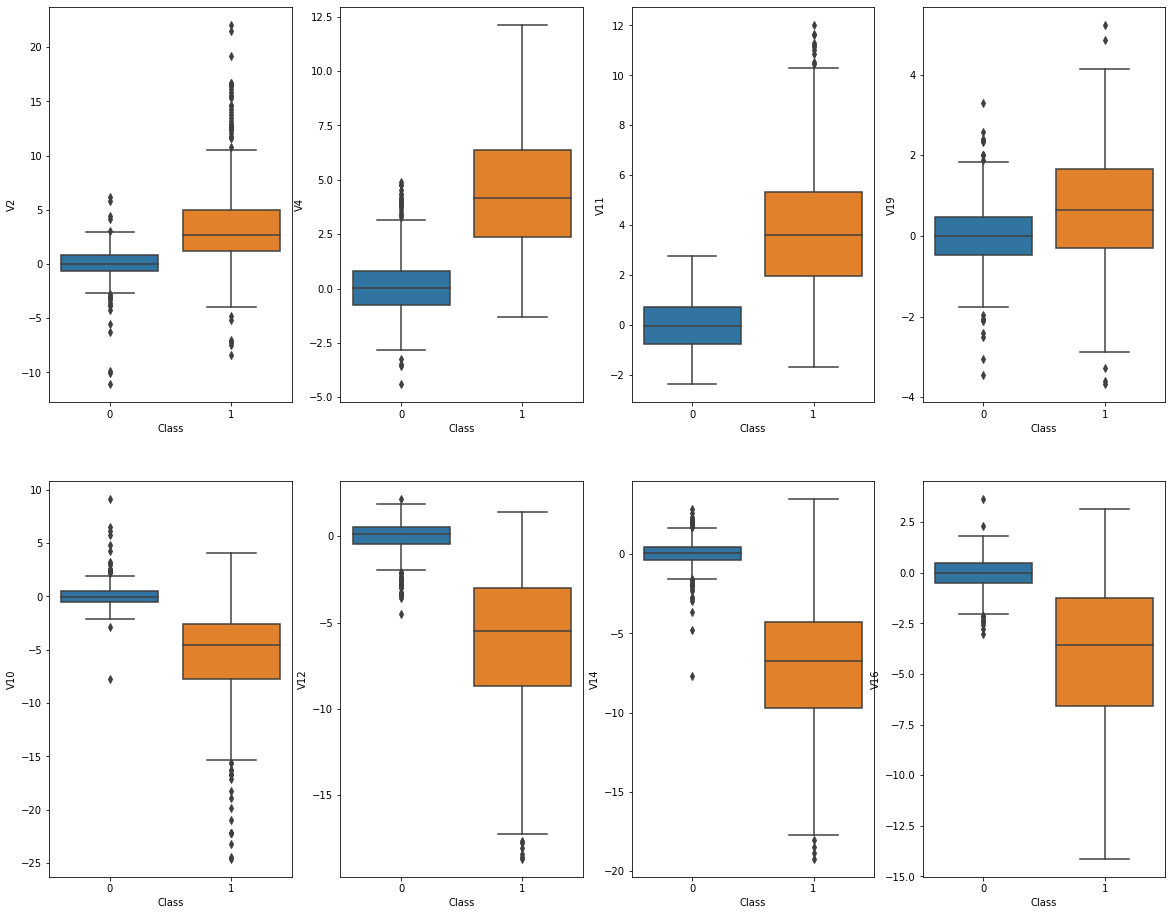

In [14]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 16))

seaborn.boxplot(x="Class", y="V2", data=df_under_samp, ax=axes[0][0])
seaborn.boxplot(x="Class", y="V4", data=df_under_samp, ax=axes[0][1])
seaborn.boxplot(x="Class", y="V11", data=df_under_samp, ax=axes[0][2])
seaborn.boxplot(x="Class", y="V19", data=df_under_samp, ax=axes[0][3])

seaborn.boxplot(x="Class", y="V10", data=df_under_samp, ax=axes[1][0])
seaborn.boxplot(x="Class", y="V12", data=df_under_samp, ax=axes[1][1])
seaborn.boxplot(x="Class", y="V14", data=df_under_samp, ax=axes[1][2])
seaborn.boxplot(x="Class", y="V16", data=df_under_samp, ax=axes[1][3])

plt.show()


The function for outlier removal using iqr.

In [15]:
def outlier_removal(df, feature, inclass):
    array = df[feature].loc[df['Class'] == inclass].values
    q25, q75 = np.percentile(array, 25), np.percentile(array, 75)
    print('25th percentile: {} | 75th percentile: {}'.format(q25, q75))
    iqr = q75 - q25
    print('Interquartile Range: {}'.format(iqr))
    cutoff = iqr*1.5
    lower_threshold, upper_threshold = q25 - cutoff, q75 + cutoff
    print('Cutoff: {}'.format(cutoff))
    print('Lower Threshold: {} | Upper Threshold: {}'.format(
        lower_threshold, upper_threshold))
    outliers = [a for a in array if a < lower_threshold or a > upper_threshold]
    print('{} Outliers: {}'.format(feature, outliers))
    print('Number of outliers detected for feature {}: {}'.format(
        feature, len(outliers)))
    df = df.drop(df[(df[feature] > upper_threshold) |
                 (df[feature] < lower_threshold)].index)
    print('Number of records after outlier removal: {}'.format(len(df)))
    print('-'*117)
    return df


Our dataframe undersampled and without outliers.

In [16]:
df_out_under_samp = outlier_removal(df_under_samp, 'V10', 1)
df_out_under_samp = outlier_removal(df_out_under_samp, 'V2', 1)


25th percentile: -7.7566982278474725 | 75th percentile: -2.6141839131895623
Interquartile Range: 5.142514314657911
Cutoff: 7.713771471986866
Lower Threshold: -15.47046969983434 | Upper Threshold: 5.099587558797303
V10 Outliers: [-16.6496281595399, -18.2711681738888, -15.5637913387301, -15.5637913387301, -16.7460441053944, -22.1870885620007, -22.1870885620007, -22.1870885620007, -22.1870885620007, -17.1415136412892, -16.3035376590131, -16.2556117491401, -16.6011969664137, -18.9132433348732, -20.9491915543611, -19.836148851696, -23.2282548357516, -24.4031849699728, -24.5882624372475]
Number of outliers detected for feature V10: 19
Number of records after outlier removal: 961
---------------------------------------------------------------------------------------------------------------------
25th percentile: 1.1453810871791 | 75th percentile: 4.48826730168204
Interquartile Range: 3.34288621450294
Cutoff: 5.01432932175441
Lower Threshold: -3.86894823457531 | Upper Threshold: 9.502596623436

We draw the boxplots again to visualize increased density of our data.

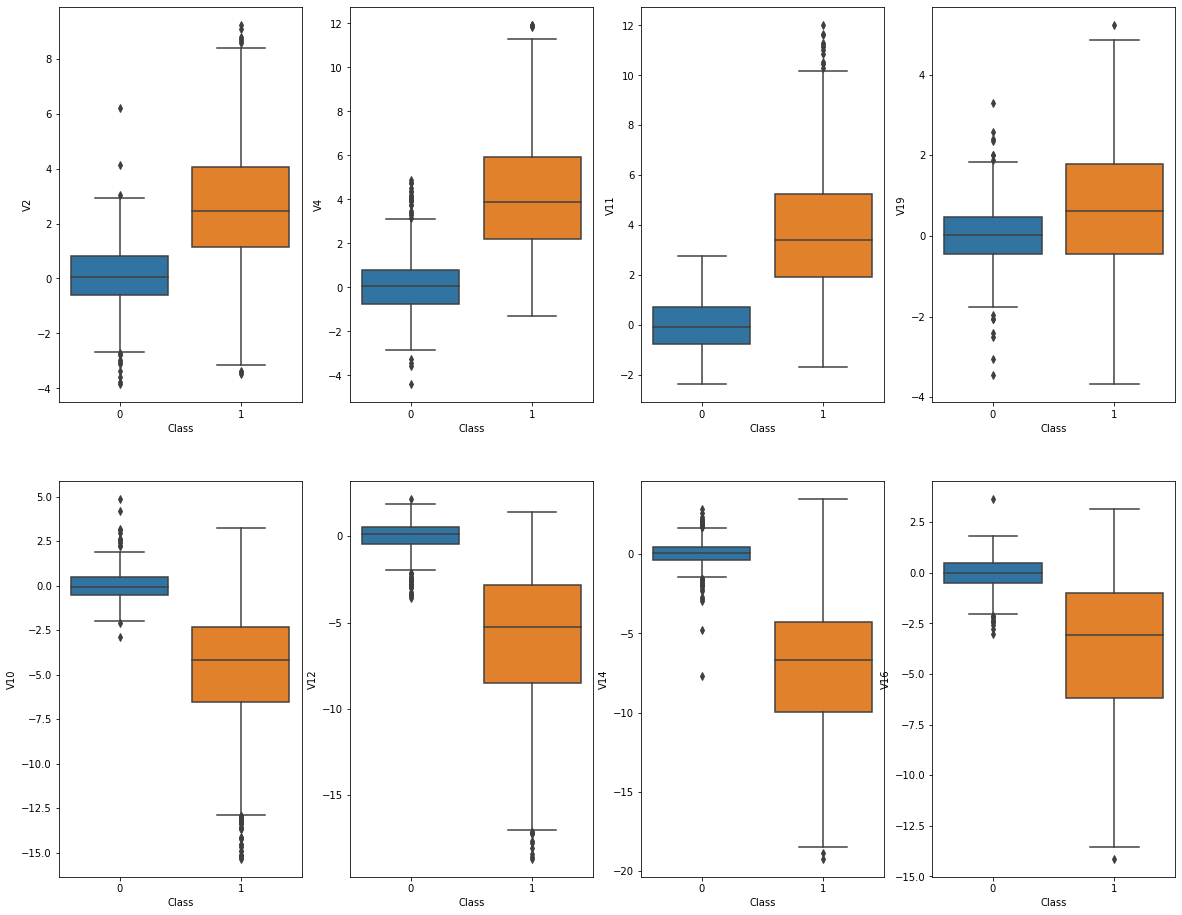

In [17]:
f, axes = plt.subplots(ncols=4, nrows=2, figsize=(20, 16))

seaborn.boxplot(x="Class", y="V2", data=df_out_under_samp, ax=axes[0][0])
seaborn.boxplot(x="Class", y="V4", data=df_out_under_samp, ax=axes[0][1])
seaborn.boxplot(x="Class", y="V11", data=df_out_under_samp, ax=axes[0][2])
seaborn.boxplot(x="Class", y="V19", data=df_out_under_samp, ax=axes[0][3])

seaborn.boxplot(x="Class", y="V10", data=df_out_under_samp, ax=axes[1][0])
seaborn.boxplot(x="Class", y="V12", data=df_out_under_samp, ax=axes[1][1])
seaborn.boxplot(x="Class", y="V14", data=df_out_under_samp, ax=axes[1][2])
seaborn.boxplot(x="Class", y="V16", data=df_out_under_samp, ax=axes[1][3])

plt.show()


We make a dataframe with only the highly correlated features which later will be used to train our svm model.

In [18]:
df_out_usamp_cvarriable = df_out_under_samp.drop(['V1', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15',
                                                 'V17', 'V18', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis=1)


# Training our models

We use two different classifiers:
* Decision Tree Classifier
* Support Vector Classifier

Since decision tree is a non parametric model it does not care about sampling nor normalization so we can use our starting dataset. 

We train our support vector classifier twice once using every feature and once with only the highly correlated features.

We of course start by splitting our data in to train and test.

In [19]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=7)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values


We write a gridsearch function which works by using multiple hyperparameteres for a model and training it trying every combination to find out the best hyperparameters for our data.

In [20]:
from sklearn.model_selection import GridSearchCV, cross_val_score

def gridsearch(classifier, params, X_train, y_train):
    grid_classifier = GridSearchCV(classifier, params)
    grid_classifier.fit(X_train, y_train)
    best_classifier = grid_classifier.best_estimator_
    return best_classifier


We train our decision tree model trying out different hyperparameters using gridsearch and using cross validation to find out our actual accuracy on training.

In [21]:
from sklearn.tree import DecisionTreeClassifier

# 8 10 12 \ 5 7
tree_params = {"criterion": ["gini", "entropy"], "max_depth": [2, 4, 6],
               "min_samples_leaf": [1, 3]}
tree_classifier = gridsearch(DecisionTreeClassifier(),
                             tree_params, X_train, y_train)
print('Best classifier with these hyper parameters:', tree_classifier)
cv_score = cross_val_score(tree_classifier, X_train, y_train, cv=5)
print('The cross validation score is:', round(cv_score.mean()*100.0, 2))


Best classifier with these hyper parameters: DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=3)
The cross validation score is: 99.94


A plot visualization of our decision tree.

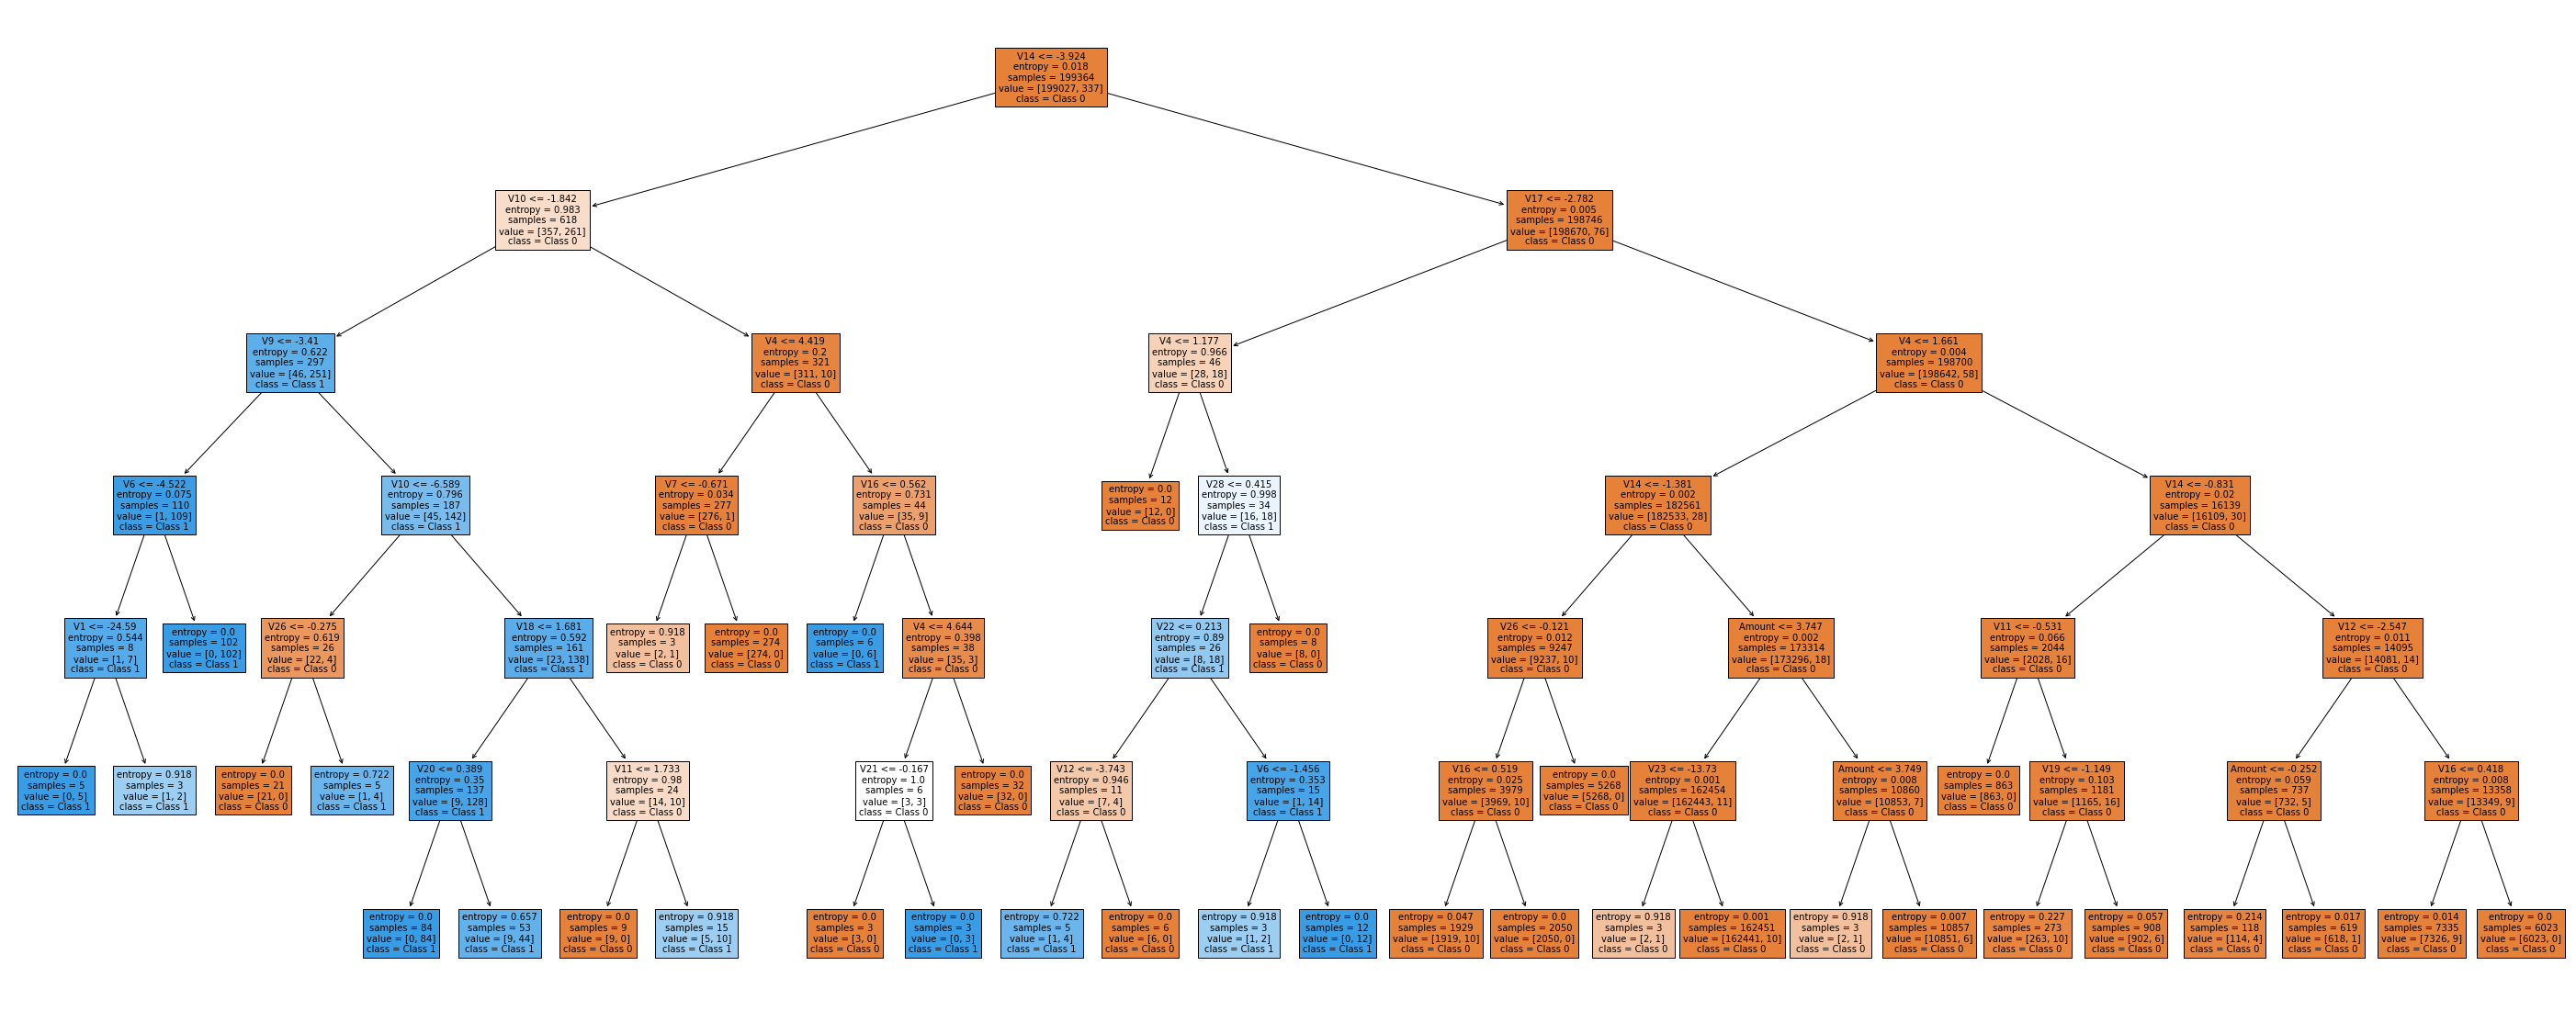

In [22]:
from sklearn import tree

fn = ['Amount', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6',
      'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15',
      'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
      'V25', 'V26', 'V27', 'V28']
cn = ['Class 0', 'Class 1']

fig = plt.figure(figsize=(50, 20))
_ = tree.plot_tree(tree_classifier,
                   feature_names=fn,
                   class_names=cn,
                   fontsize=10,
                   filled=True)


Function that plots our learning curve, which shows us:
* The wider the gap between the training score and the cross validation score, the more likely your model is overfitting (high variance).
* If the score is low in both training and cross-validation sets this is an indication that our model is underfitting (high bias)

In [23]:
import plotly.graph_objects as go
from sklearn.model_selection import learning_curve


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fig = go.Figure()
    fig.add_trace(go.Scatter(name='Training score - Standard Deviation',
                             x=train_sizes,
                             y=train_scores_mean+train_scores_std,
                             mode='lines',
                             showlegend=False,
                             marker=dict(color='green')))
    fig.add_trace(go.Scatter(name='Training score',
                             x=train_sizes,
                             y=train_scores_mean,
                             fill='tonexty',
                             mode='lines+markers',
                             marker=dict(color='green')))
    fig.add_trace(go.Scatter(name='Training score + Standard Deviation',
                             x=train_sizes,
                             y=train_scores_mean-train_scores_std,
                             mode='lines',
                             fill='tonexty',
                             showlegend=False,
                             marker=dict(color='green')))
    fig.add_trace(go.Scatter(x=train_sizes,
                             y=test_scores_mean+test_scores_std,
                             mode='lines',
                             showlegend=False,
                             marker=dict(color='red')))
    fig.add_trace(go.Scatter(name='Validation Score',
                             x=train_sizes,
                             y=test_scores_mean,
                             mode='lines+markers',
                             fill='tonexty',
                             marker=dict(color='red')))
    fig.add_trace(go.Scatter(x=train_sizes,
                             y=test_scores_mean-test_scores_std,
                             mode='lines',
                             fill='tonexty',
                             showlegend=False,
                             marker=dict(color='red')))

    fig.update_layout(width=700, height=400, template='seaborn', title=title,
                      margin=dict(l=60, r=0, b=0, t=40), legend=dict(orientation='h', x=0.5, y=1),
                      xaxis=dict(title='Training examples',
                                 mirror=True, linecolor='black', linewidth=2),
                      yaxis=dict(title='Scores', range=ylim if ylim is not None else None,
                                 mirror=True, linecolor='black', linewidth=2))
    return fig


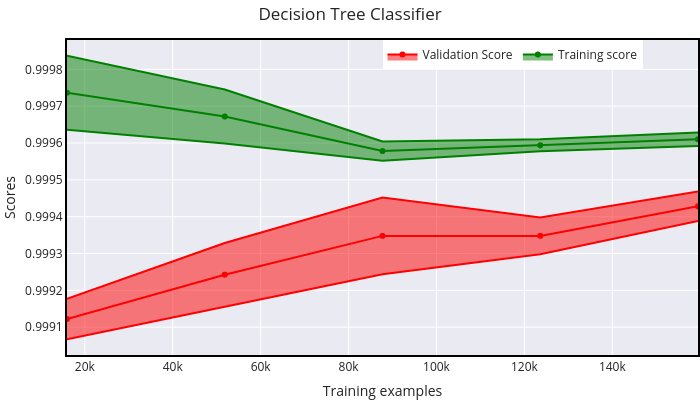

In [24]:
fig = plot_learning_curve(tree_classifier, 'Decision Tree Classifier',
                    X_train, y_train, n_jobs=10)
fig.show('png')

Now we check our accuracy, precision and recall on our test data. 
* we have 100% accuracy which because of our heavily skewed dataset is predictable since our misclassifications of the positive class concerns only 0.17% of our data.
* We have 87% precision on our positive class which is higher than our recall that tells us we have a higher amount of false negatives but not by much and both being high means that we have not that many of both.

In [25]:
from sklearn.metrics import classification_report

tree_pred = tree_classifier.predict(X_test)

print(classification_report(y_test, tree_pred,
      target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00     85288
     Class 1       0.87      0.84      0.86       155

    accuracy                           1.00     85443
   macro avg       0.94      0.92      0.93     85443
weighted avg       1.00      1.00      1.00     85443



A function to calculate our confusion matrix which shows us the real values and our predicted values and how many times we misclassified our data.

In [26]:
from sklearn.metrics import confusion_matrix
import plotly.figure_factory as ff


def plot_confusion_matrix(y_test, pred):
    cnf_matrix = confusion_matrix(y_test, pred)

    labels = ['Class 0', 'Class 1']

    fig = ff.create_annotated_heatmap(
        cnf_matrix[::-1], x=labels, y=labels[::-1])

    fig.add_annotation(dict(font=dict(color="black", size=14),
                            x=0.5,
                            y=-0.15,
                            showarrow=False,
                            text="Predicted value",
                            xref="paper",
                            yref="paper"))

    fig.add_annotation(dict(font=dict(color="black", size=14),
                            x=-0.2,
                            y=0.5,
                            showarrow=False,
                            text="Real value",
                            textangle=-90,
                            xref="paper",
                            yref="paper"))

    fig.update_layout(margin=dict(t=50, l=100), width=500)

    fig['data'][0]['showscale'] = True
    return fig


The confusion matrix show us that on our test set for our decision tree we have 19 misclassifications on our negative and 25 misclassifications on our positive classes.

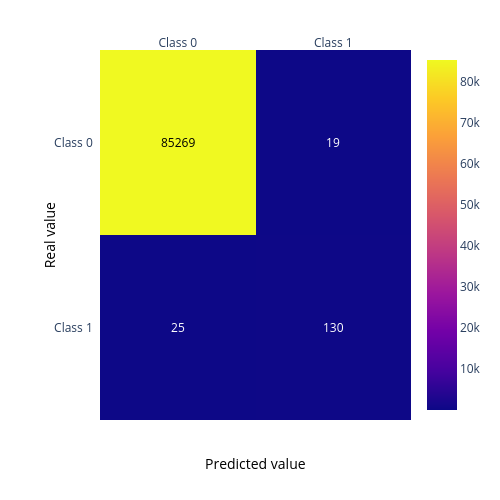

In [27]:
fig = plot_confusion_matrix(y_test, tree_pred)
fig.show('png')


Splitting our data to start training our svm model.

In [28]:
X_out_under_samp = df_out_under_samp.drop('Class', axis=1)
y_out_under_samp = df_out_under_samp['Class']

X_train_ousamp, X_test_ousamp, y_train_ousamp, y_test_ousamp = train_test_split(
    X_out_under_samp, y_out_under_samp, test_size=0.2, random_state=7)

X_train_ousamp = X_train_ousamp.values
X_test_ousamp = X_test_ousamp.values
y_train_ousamp = y_train_ousamp.values
y_test_ousamp = y_test_ousamp.values


Again we use grid search to find the best hyperparameters for our model; this time svm.

After which cross validation is used to score our training.

In [29]:
from sklearn.svm import SVC

svc_params = {'C': [0.1, 0.5, 0.7, 0.9, 1],
              'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}

svm_classifier = gridsearch(SVC(), svc_params, X_train_ousamp, y_train_ousamp)
print('Best classifier with these hyper parameters:', svm_classifier)
cv_score = cross_val_score(
    svm_classifier, X_train_ousamp, y_train_ousamp, cv=5)
print('The cross validation score is:', round(cv_score.mean()*100.0, 2))


Best classifier with these hyper parameters: SVC(C=0.1, kernel='linear')
The cross validation score is: 94.39


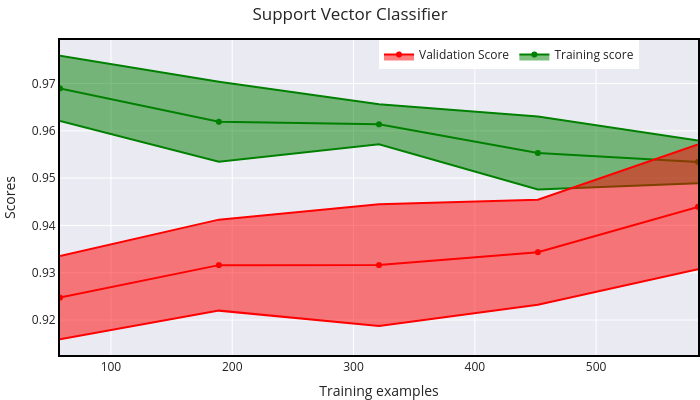

In [30]:
fig = plot_learning_curve(svm_classifier, 'Support Vector Classifier',
                    X_train_ousamp, y_train_ousamp, n_jobs=10)
fig.show('png')

* Here we have an accuracy of 92% which is more informative since our classses our equally distributed now which tells us 92% of the time our classifications our correct.
* We have more false positives than false negatives in our classification.

In [31]:
svc_pred = svm_classifier.predict(X_test_ousamp)

print(classification_report(y_test_ousamp, svc_pred,
      target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       0.87      0.96      0.91        83
     Class 1       0.97      0.88      0.92       100

    accuracy                           0.92       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.92      0.92      0.92       183



A confusion matrix showing us that we have 3 misclassifications for our negative model and 12 for our positive model.

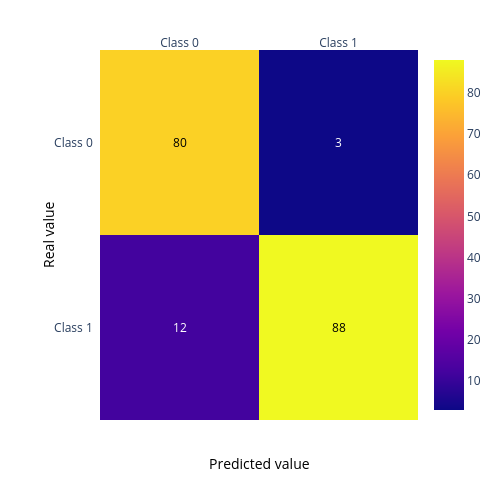

In [32]:
fig = plot_confusion_matrix(y_test_ousamp, svc_pred)
fig.show('png')


Now we try our model on the whole data that was not sampled.

Of course since we use 80% of our positive class in training the model we end up with way more false positives than negatives which is predictable.

In [33]:
y_pred = svm_classifier.predict(X.values)

print(classification_report(y.values.ravel(), y_pred,
      target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.99    284315
     Class 1       0.06      0.92      0.11       492

    accuracy                           0.97    284807
   macro avg       0.53      0.95      0.55    284807
weighted avg       1.00      0.97      0.98    284807



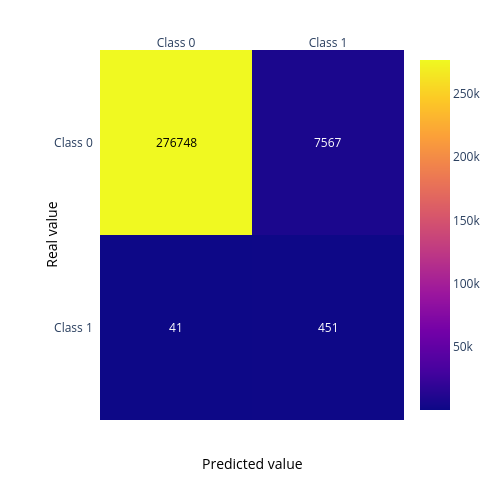

In [34]:
fig = plot_confusion_matrix(y.values, y_pred)
fig.show('png')


Now we split our only-highly correlated features dataset to use for training our svm model.

In [35]:
X_out_usamp_cvarriable = df_out_usamp_cvarriable.drop('Class', axis=1)
y_out_usamp_cvarriable = df_out_usamp_cvarriable['Class']

X_train_ousampc, X_test_ousampc, y_train_ousampc, y_test_ousampc = train_test_split(
    X_out_usamp_cvarriable, y_out_usamp_cvarriable, test_size=0.2, random_state=7)

X_train_ousampc = X_train_ousampc.values
X_test_ousampc = X_test_ousampc.values
y_train_ousampc = y_train_ousampc.values
y_test_ousampc = y_test_ousampc.values


In [36]:
svm_classifier_correlated = gridsearch(
    SVC(), svc_params, X_train_ousampc, y_train_ousampc)
print('Best classifier with these hyper parameters:', svm_classifier_correlated)
cv_score = cross_val_score(
    svm_classifier_correlated, X_train_ousampc, y_train_ousampc, cv=5)
print('The cross validation score is:', round(cv_score.mean()*100.0, 2))


Best classifier with these hyper parameters: SVC(C=0.5, kernel='linear')
The cross validation score is: 94.39


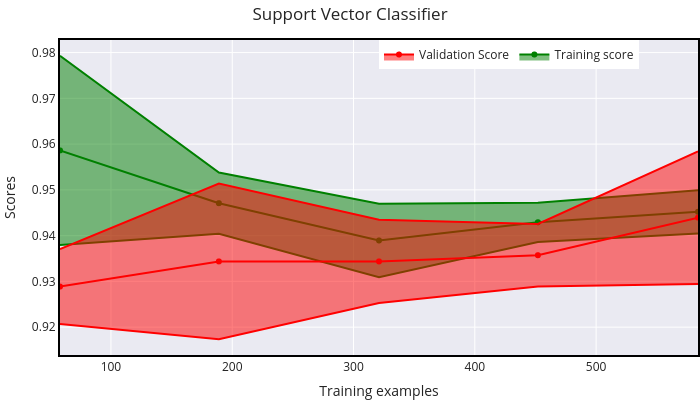

In [37]:
fig = plot_learning_curve(svm_classifier_correlated, 'Support Vector Classifier',
                          X_train_ousampc, y_train_ousampc, n_jobs=10)
fig.show('png')


It appers that whilst using only highly correlated features we end up with more false negatives than false positives which could be more or less valuable depending on what we are trying to find out by classifying our data.

In [38]:
svc_correlated_pred = svm_classifier_correlated.predict(X_test_ousampc)

print(classification_report(y_test_ousampc, svc_correlated_pred,
      target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       0.85      0.99      0.92        83
     Class 1       0.99      0.86      0.92       100

    accuracy                           0.92       183
   macro avg       0.92      0.92      0.92       183
weighted avg       0.93      0.92      0.92       183



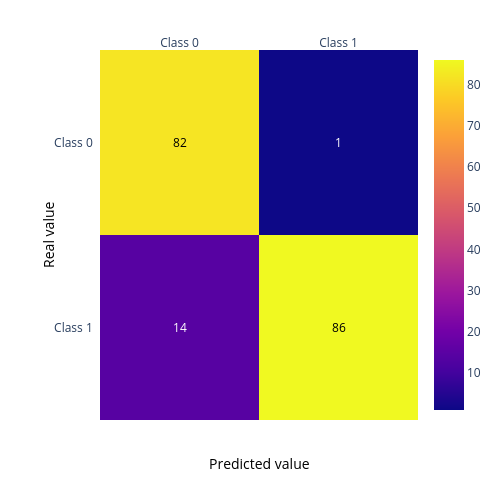

In [39]:
fig = plot_confusion_matrix(y_test_ousampc, svc_correlated_pred)
fig.show('png')


In [40]:
X_c = X.drop(['V1', 'V3', 'V5', 'V6', 'V7', 'V8', 'V9', 'V13', 'V15',
                                                 'V17', 'V18', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'], axis = 1)

y_correlated_pred = svm_classifier_correlated.predict(X_c.values)

print(classification_report(y.values.ravel(), y_correlated_pred,
      target_names=['Class 0', 'Class 1']))


              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99    284315
     Class 1       0.07      0.89      0.14       492

    accuracy                           0.98    284807
   macro avg       0.54      0.94      0.56    284807
weighted avg       1.00      0.98      0.99    284807



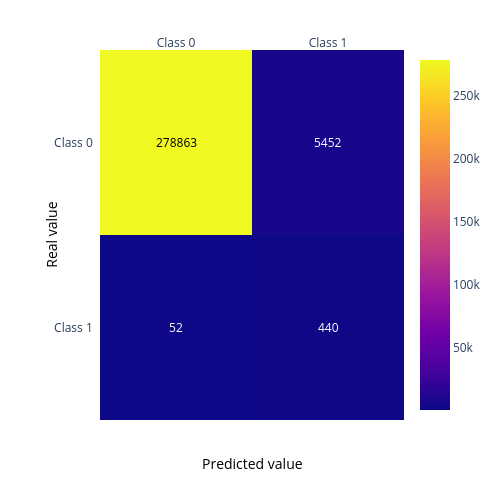

In [41]:
fig = plot_confusion_matrix(y.values, y_correlated_pred)
fig.show('png')
